# MNIST Dataset Classification

## Fetching the data

In [1]:
from sklearn.datasets import fetch_openml
import numpy as np

In [2]:
mnist = fetch_openml("mnist_784") 

In [3]:
X,y = mnist['data'],mnist['target']

In [4]:
X = np.array(X)

In [5]:
X.shape

(70000, 784)

In [6]:
y.shape

(70000,)

In [7]:
y = np.array(y)

## Plotting the image

In [8]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

In [9]:
some_digit = X[36001]
some_digit_image = some_digit.reshape(28,28)

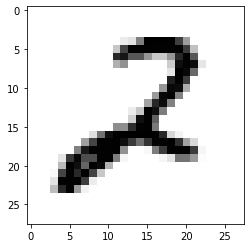

In [10]:
plt.imshow(X=some_digit_image, cmap=matplotlib.cm.binary, interpolation='nearest')
plt.show()

In [11]:
y[36001]

'2'

## Splitting the data into train and test set

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.14285,random_state=42)

In [14]:
len(X_train)

60000

In [15]:
len(X_test)

10000

## Creating a 2 detector

In [16]:
y_train = y_train.astype(np.int8)
y_test = y_test.astype(np.int8)
y_train_2 = (y_train==2)
y_test_2 = (y_test==2)

In [17]:
# for data in y_train:
#     if data==2:
#         print(True)
#     else:
#         print(False)

In [18]:
y_train_2

array([ True, False, False, ..., False, False, False])

In [19]:
from sklearn.linear_model import LogisticRegression

In [20]:
clf = LogisticRegression()

In [21]:
import warnings
warnings.filterwarnings('ignore')

In [22]:
clf.fit(X_train,y_train_2)

LogisticRegression()

In [23]:
clf.predict([some_digit])

array([ True])

## Cross validation

### Cross val score
Cross_val_score gives the accuracy score of the predctions

In [24]:
from sklearn.model_selection import cross_val_score
a= cross_val_score(clf, X_train, y_train_2, cv=3, scoring='accuracy')

In [25]:
a.mean()

0.9775999999999999

### Cross val predict
Cross_val_predict gives the actual predicted vals

In [26]:
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(clf, X_train, y_train_2, cv=3)

In [27]:
y_train_pred

array([ True, False, False, ..., False, False, False])

## Confusion Matrix

In [28]:
from sklearn.metrics import confusion_matrix

In [29]:
confusion_matrix(y_train_2,y_train_pred)

array([[53479,   498],
       [  846,  5177]], dtype=int64)

## Precsion, Recall and F1_score

In [30]:
from sklearn.metrics import precision_score, recall_score, f1_score

In [31]:
precision_score(y_train_2,y_train_pred)

0.9122466960352423

In [32]:
recall_score(y_train_2,y_train_pred)

0.8595384359953512

In [33]:
f1_score(y_train_2,y_train_pred)

0.8851085655667635

## Plotting Precision_Recall_Curve

In [34]:
from sklearn.metrics import precision_recall_curve

In [35]:
y_scores = cross_val_predict(clf, X_train, y_train_2, cv=3, method='decision_function')

In [36]:
y_scores

array([ 4.68409833, -6.17228409, -6.54574845, ..., -5.7954758 ,
       -7.6239543 , -4.64661541])

In [37]:
precision, recall, threshold = precision_recall_curve(y_train_2,y_scores)

In [38]:
precision

array([0.10174502, 0.10172985, 0.10173157, ..., 1.        , 1.        ,
       1.        ])

In [39]:
recall

array([1.00000000e+00, 9.99833970e-01, 9.99833970e-01, ...,
       3.32060435e-04, 1.66030217e-04, 0.00000000e+00])

In [40]:
threshold

array([-24.48889388, -24.486848  , -24.48169088, ...,  17.54325853,
        18.77757437,  19.66064145])

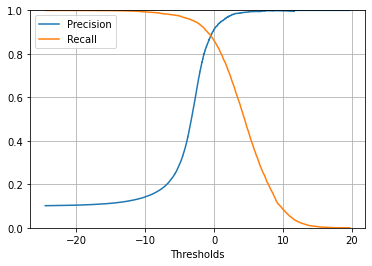

In [41]:
plt.grid()
plt.plot(threshold,precision[:-1],label='Precision')
plt.plot(threshold,recall[:-1],label='Recall')
plt.legend(loc='upper left')
plt.xlabel("Thresholds")
plt.ylim([0,1])
plt.show()